In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv("heart_disease_uci.csv") 

In [16]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  ca        920 non-null    float64
 12  thal      920 non-null    int64  
 13  num       920 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 100.8 KB
None


In [17]:
print(df.head())

   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3     145.0  233.0    1        0   150.0      0      2.3      0   
1   67    1   0     160.0  286.0    0        0   108.0      1      1.5      1   
2   67    1   0     120.0  229.0    0        0   129.0      1      2.6      1   
3   37    1   2     130.0  250.0    0        1   187.0      0      3.5      0   
4   41    0   1     130.0  204.0    0        0   172.0      0      1.4      2   

    ca  thal  num  
0  0.0     0    0  
1  3.0     1    2  
2  2.0     2    1  
3  0.0     1    0  
4  0.0     1    0  


In [59]:
# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

In [60]:
print("Initial Columns:", df.columns)
print(df.head())


Initial Columns: Index(['id', 'age', 'dataset', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'ca', 'target', 'sex_male', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_normal',
       'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')
   id  age  dataset  trestbps   chol  fbs  thalch  exang  oldpeak   ca  ...  \
0   1   63        0     145.0  233.0    1   150.0      0      2.3  0.0  ...   
1   2   67        0     160.0  286.0    0   108.0      1      1.5  3.0  ...   
2   3   67        0     120.0  229.0    0   129.0      1      2.6  2.0  ...   
3   4   37        0     130.0  250.0    0   187.0      0      3.5  0.0  ...   
4   5   41        0     130.0  204.0    0   172.0      0      1.4  0.0  ...   

   sex_male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0      True               False           False               True   
1      True         

In [61]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 id                          0
age                         0
dataset                     0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
target                      0
sex_male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


In [62]:
# Handle missing values: Replace '?' with NaN & convert numeric columns
df.replace('?', np.nan, inplace=True)

In [63]:
# Convert specific columns to numeric (if they exist)
numeric_cols = ['ca', 'thal', 'oldpeak', 'trestbps', 'chol', 'thalach']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [64]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [65]:
target_col = 'target' if 'target' in df.columns else 'num'

In [66]:
# Convert target variable to binary (0 or 1) if needed
if df[target_col].nunique() > 2:
    df[target_col] = (df[target_col] > 0).astype(int)

In [67]:
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)

In [68]:
binary_cols = ['fbs', 'exang']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

In [69]:
# Define features and target variable
X = df.drop(columns=[target_col])  # Features
y = df[target_col]  # Target variable (Heart disease: 1, No disease: 0)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [72]:
y_pred = clf.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.2f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Model Accuracy: 0.87

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        75
           1       0.89      0.89      0.89       109

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



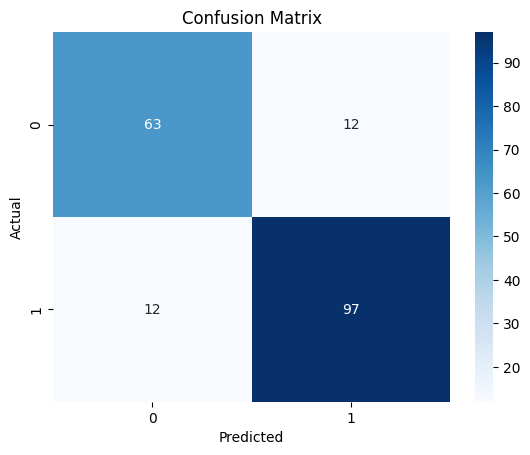

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

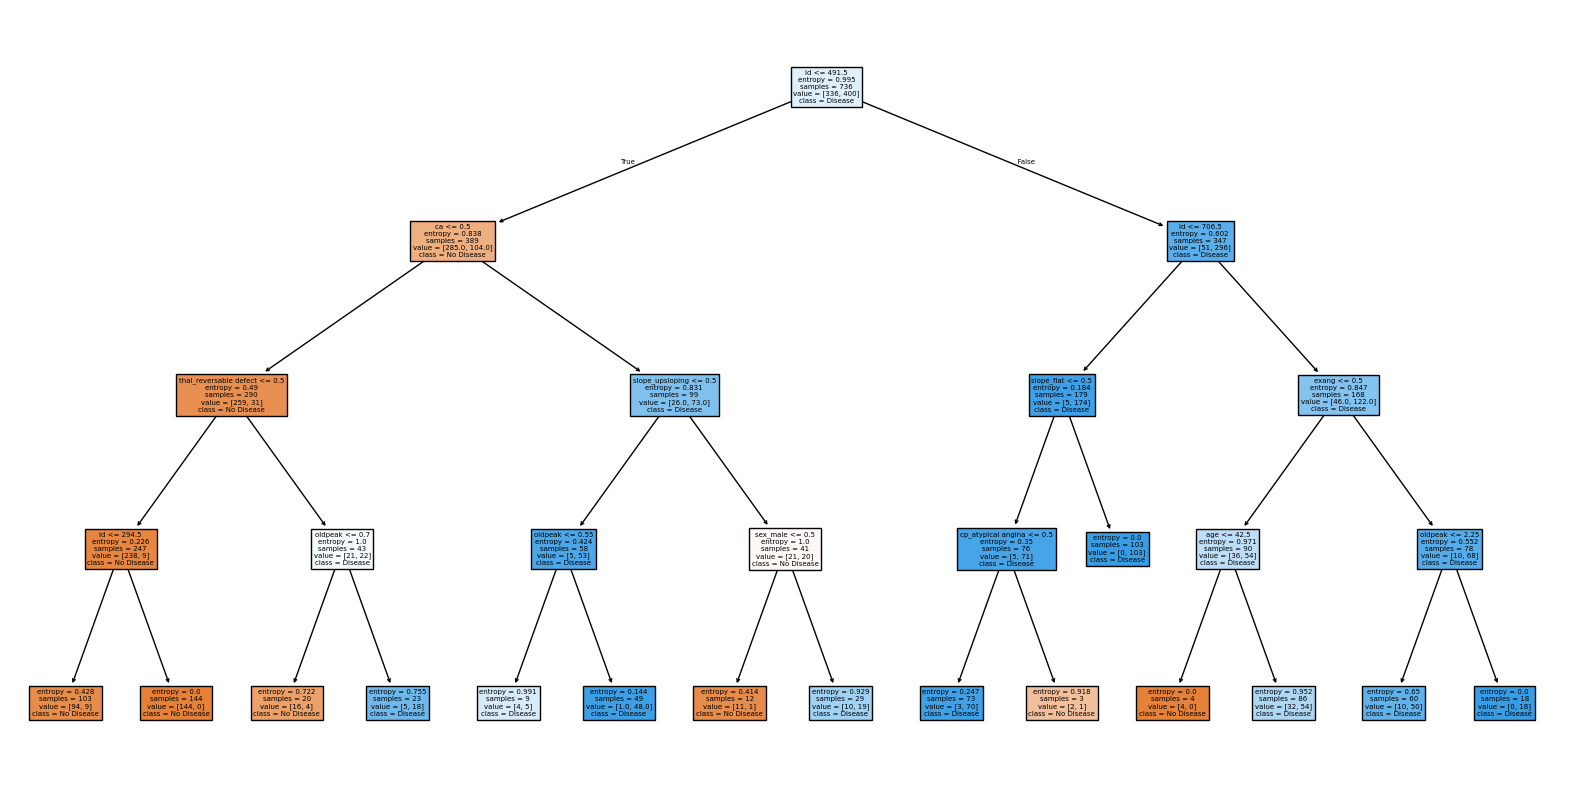

In [75]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()